In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
%matplotlib inline

Categories = ["Apple___healthy","Apple___Cedar_apple_rust", "Apple___Apple_scab", "Apple___Black_rot"]
DataPath = ""

In [2]:
datasets = []

for category in Categories:
    path = os.path.join(DataPath, category)
    class_num = Categories.index(category)
        
    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        new_array = cv2.resize(img_array, (84, 84))
        datasets.append([new_array, class_num])


from sklearn.model_selection import train_test_split
import random

Train_data, Test_data= train_test_split(datasets, test_size = 0.20, random_state=28)

print("")
print('Train set length: ', len(Train_data))
print('Test set length: ', len(Test_data))

100%|███████████████████████████████████████████████████████████████████████████████| 270/270 [00:02<00:00, 101.26it/s]



Train set length:  864
Test set length:  216


In [3]:
print('jumlah kelas: ', len(Categories))
print('jumlah data: ', len(datasets))


jumlah kelas:  4
jumlah data:  1080


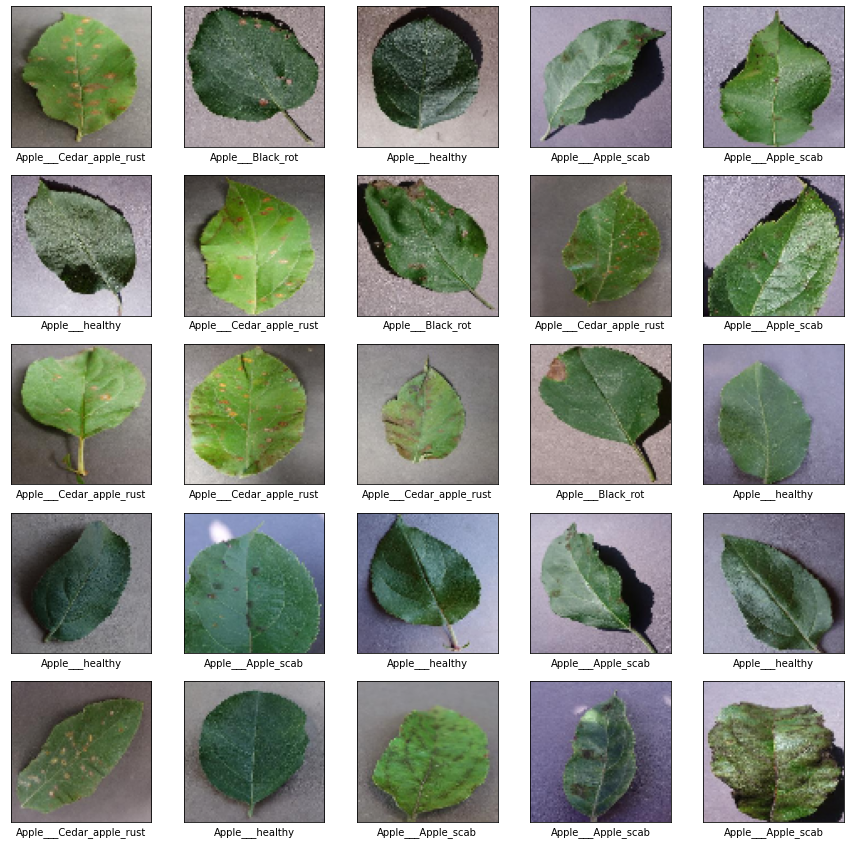

In [4]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Train_data[i][0])
    plt.xlabel(Categories[Train_data[i][1]])
plt.show()

In [5]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for features,label in Train_data:
    X_train.append(features)
    Y_train.append(label)

for features,label in Test_data:
    X_test.append(features)
    Y_test.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(864, 84, 84, 3)
(864,)
(216, 84, 84, 3)
(216,)


In [6]:
# Use dimensionality reduction on the data reshaped
X_train = X_train.reshape(len(X_train), 84*84*3)
X_test = X_test.reshape(len(X_test), 84*84*3)

print(X_train.shape)
print(X_test.shape)

(864, 21168)
(216, 21168)


In [7]:
# First Method - Logistic Regression #############################
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Prediction
predictions = logmodel.predict(X_test)

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_test, predictions))
print("Accuracy:",round(accuracy_score(Y_test, predictions), 2))
# 0 = "Apple___healthy", 
# 1 = ""Apple___Cedar_apple_rust"
# 2 = "Apple___Apple_scab", 
# 3 = "Apple___Black_rot"


              precision    recall  f1-score   support

           0       0.87      0.95      0.91        62
           1       0.97      0.98      0.98        60
           2       0.86      0.82      0.84        45
           3       0.91      0.82      0.86        49

    accuracy                           0.90       216
   macro avg       0.90      0.89      0.90       216
weighted avg       0.90      0.90      0.90       216

Accuracy: 0.9


Text(0.5, 257.44, 'Predicted label')

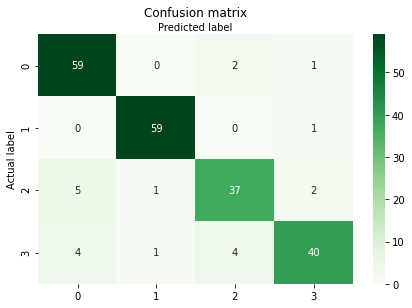

In [10]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, predictions)
cnf_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Greens", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logmodel, X_train,Y_train, cv=10)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 10 folds
print(scores.mean())

[0.83908046 0.83908046 0.89655172 0.90804598 0.93023256 0.91860465
 0.8255814  0.89534884 0.91860465 0.87209302]
0.8843223736968724


In [12]:
# 0 = "Apple___healthy", 
# 1 = ""Apple___Cedar_apple_rust"
# 2 = "Apple___Apple_scab", 
# 3 = "Apple___Black_rot"

In [13]:
import pickle
# Open the file to save as pkl file
# The wb stands for write and binary
model_pkl = open("LogisticRegressionmodel.pkl", "wb")

# Write to the file (dump the model)
# Open the file to save as pkl file
pickle.dump(logmodel, model_pkl)
# Close the pickle file
model_pkl.close()